In [1]:
pip install scikit-plot

     |████████████████████████████████| 296kB 2.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics
import scikitplot as skplt

In [51]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

We will use titanic dataset which is available on kaggle.
Dataset is downloaded from https://www.kaggle.com/c/titanic. This dataset is about people on titanic.

In [52]:
#Store result from different models
model_result = {} 
#Load data in pandas dataframe
titanic_data = pd.read_csv('./Titanic.csv', sep='\t')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
#Keep selected columns
titanic_data = titanic_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]

In [54]:
print(titanic_data.shape)
print(titanic_data['Survived'].value_counts())
titanic_data.dtypes

(156, 8)
0    102
1     54
Name: Survived, dtype: int64


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
Fare        float64
dtype: object

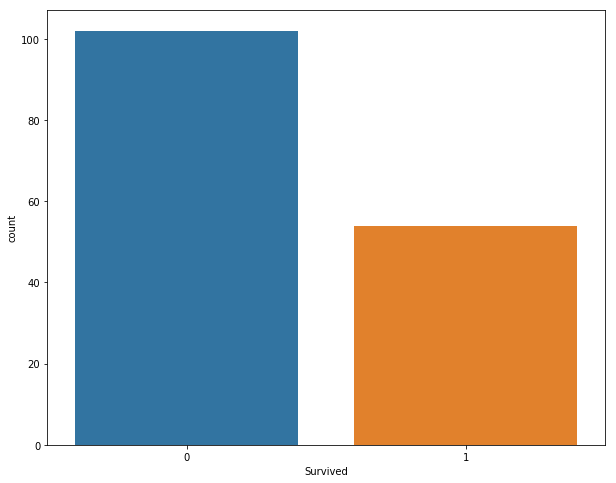

In [55]:
sns.countplot(x='Survived',data=titanic_data)


In [56]:
titanic_data.isnull().any()
#Now, check the count of null value in each feature.

titanic_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         30
SibSp        0
Parch        0
Embarked     1
Fare         0
dtype: int64

In [57]:
titanic_data['Age'] .fillna ((titanic_data['Age'] .mean()), inplace=True)
# Embarked contains two null values. We can drop these two records without impacting much on our algorithm.

titanic_data.dropna(inplace=True)


In [58]:
#Take dependent and independent variables separately
titanic_data_X = titanic_data[['Pclass','Sex','Age','SibSp','Parch', 'Embarked', 'Fare']]
titanic_data_Y = titanic_data[['Survived']]

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic_data_X, titanic_data_Y, test_size=0.20)

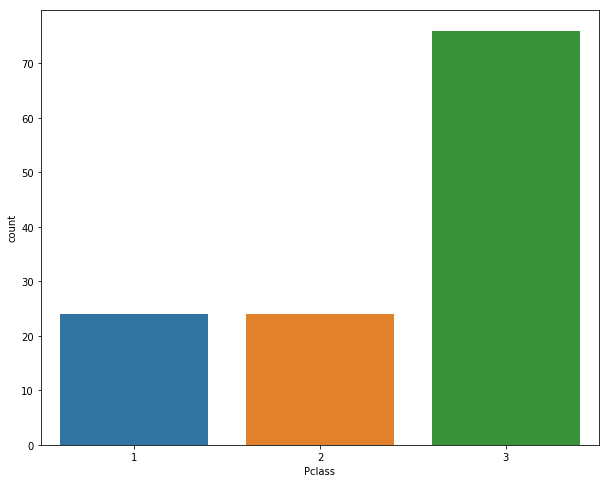

In [60]:
#Check the count of Pclass
sns.countplot(x='Pclass',data=X_train) 
titanic_data_Y = titanic_data[['Survived']]


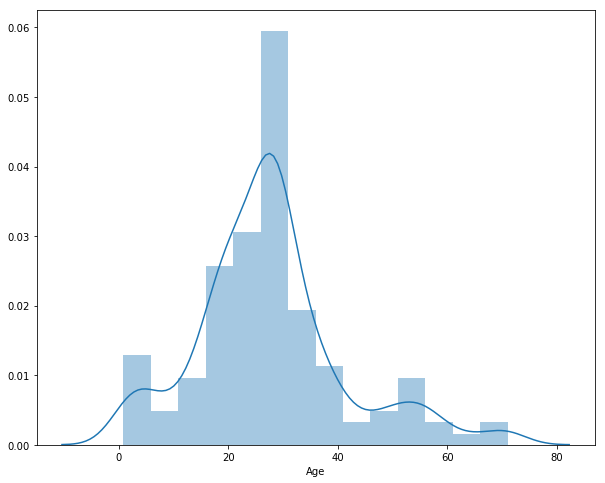

In [61]:
#Check the distribution of age data.
sns.distplot(X_train['Age'])


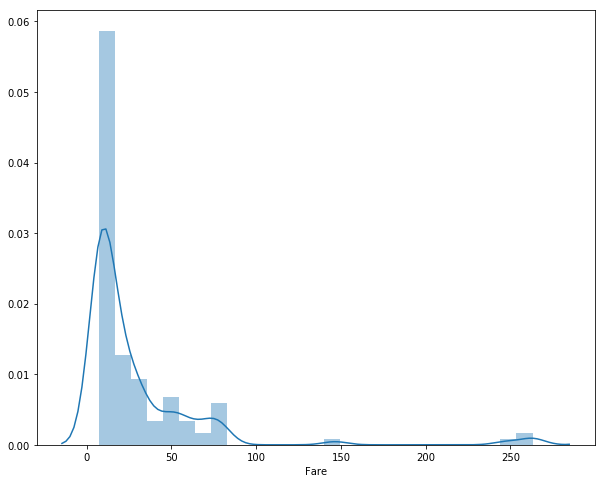

In [62]:
sns.distplot(X_train['Fare'])

In [63]:
#We will perform Z-Score normalization on both these features.

age_scaler = StandardScaler()
age_scaler.fit(pd.DataFrame(X_train['Age']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:


#Transform age
X_train[['Age']] = age_scaler.transform(X_train[['Age']])

#Perform same normalization with Fare.

fare_scaler = StandardScaler()
fare_scaler.fit(pd.DataFrame(X_train['Fare']))
#Transform fare
X_train[['Fare']] = fare_scaler.transform(X_train[['Fare']])

In [65]:
#Change sex feature to 0,1 value.
X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male':1})

In [66]:
# Embarked has 3 categories. We can create three different variable which represents each category.

embarked_encoder = preprocessing.LabelEncoder()
embarked_encoder.fit(pd.DataFrame(X_train['Embarked']))

#Transform Embarked

X_train[['Embarked']] = embarked_encoder.transform(X_train[['Embarked']])


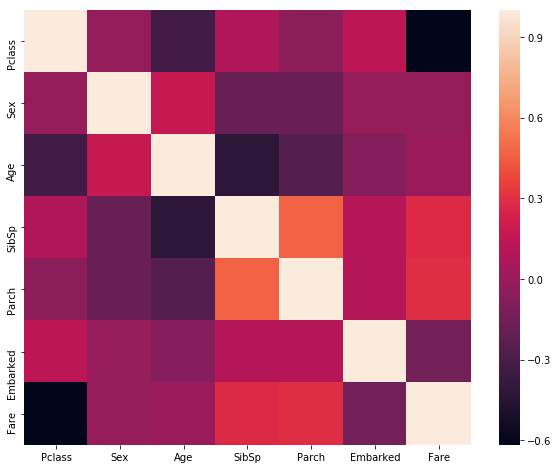

In [67]:
# Correlación de variables

sns.heatmap(X_train.corr())

In [68]:
#Fare and Pclass has high correlation. 
# In logistic regression features should not be correlated. So remove one variable.

del X_train['Pclass']

In [70]:
# Modelo
X_train_original = X_train
X_train = X_train.values
Y_train = Y_train.values
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)

#Coeficientes
coefficients = pd.concat([pd.DataFrame(X_train_original.columns), pd.DataFrame(np.transpose(logistic_regression.coef_))], axis = 1)
coefficients.columns = ['Feature','coefficient']
coefficients = coefficients.append({'Feature':'Intercept','coefficient':logistic_regression.intercept_[0]}, ignore_index=True)
coefficients


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [46]:
# first we need to transform the test data same as we did with training data.
# Creamos una función que nos haga el trabajo sucio

def transform_test_data(test_data,age_scaler,fare_scaler, embarked_encoder):
    test_data['Sex'] = test_data['Sex'].map({'female': 0,'male': 1})
    test_data[['Age']] = age_scaler.transform(test_data[['Age']])
    test_data[['Fare']] = fare_scaler.transform(test_data[['Fare']])
    test_data[['Embarked']] =embarked_encoder.transform(test_data[['Embarked']])
    del test_data['Pclass']
    return test_data


In [ ]:
X_test = transform_test_data(X_test,age_scaler,fare_scaler,embarked_encoder)

In [ ]:
X_test = X_test.values
Y_test = Y_test.values

# Predict on test data

Y_pred = logistic_regression.predict(X_test)

In [ ]:
confusion_matrix(Y_test,Y_pred)

#Classification report
print(classification_report(Y_test, Y_pred))

#Accuracy
print(accuracy_score(Y_test,Y_pred))

In [ ]:
scikitplot.estimators.plot_learning_curve(logistic_regression, X_train,Y_train)


In [ ]:
# Predict probability instead of class in logistic regression:

Y_pred_prob = logistic_regression.predict_proba(X_test)

#ROC curve:

class_1_prob = list()
for i in Y_pred_prob:
    class_1_prob.append(i[1])
print(roc_auc_score(Y_test,class_1_prob))

model_result['Logistic Regression (L2)'] = roc_auc_score(Y_test,class_1_prob)
scikitplot.metrics.plot_roc_curve(Y_test, Y_pred_prob,curves=['each_class'])
